This notebook demonstrates some basic statistical principles - mean, median, mode, range, variance, and standard deviation.

In [1]:
# Import the required packages, 
# with their conventional names 
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.stats as stats 

In [4]:
# Generate some data ... 10000 samples chosen from a Gaussian distribution with a mean of 100 and a sigma of 10.
npts = 10000
mu = 100.0
sigma = 10.0

x = stats.norm.rvs(size=npts,loc=mu,scale=sigma)

print (x)

[118.95067948 103.62516236  91.69999951 ...  97.03589358 104.41272748
 115.11372432]


(array([  2.,   2.,   0.,   1.,   1.,   1.,   0.,   3.,   4.,   1.,   2.,
          2.,   6.,   9.,   8.,  14.,  14.,  24.,  22.,  22.,  36.,  33.,
         49.,  55.,  71.,  65.,  79.,  84., 127., 127., 113., 150., 151.,
        166., 190., 196., 242., 243., 252., 266., 292., 301., 323., 346.,
        345., 333., 347., 339., 274., 317., 322., 301., 320., 285., 285.,
        254., 232., 207., 219., 183., 161., 159., 130., 140.,  98., 107.,
         74.,  75.,  58.,  56.,  40.,  45.,  40.,  26.,  22.,  23.,  22.,
         16.,  11.,   6.,  11.,   4.,   1.,   6.,   4.,   2.,   2.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]), array([ 61.57109714,  62.39414843,  63.21719971,  64.04025099,
         64.86330228,  65.68635356,  66.50940484,  67.33245612,
         68.15550741,  68.97855869,  69.80160997,  70.62466125,
         71.44771254,  72.27076382,  73.0938151 ,  73.91686638,
         74.73991767,  75.56296895,  76.38602023,  77.20907151,

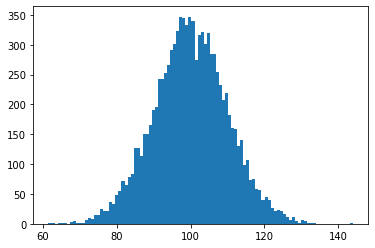

In [5]:
# Plot a histogram of the data
numbins = 100
plt.hist(x, bins=numbins)

# The information printed out is as follows:
#
# The first array is the number of entries in each bin.
# The second array gives the x-values of the EDGES of the bins, which are
# determined automatically by matplotlib.pyplot/numpy.  Thus, there are (numbins+1) values in this array.

In [6]:
# calculate the sample mean ... this is the mathematical average of the all of the data points.
# Note that this number is not exactly 100!  The reason is that the sample mean is an ESTIMATE
# of the true mean (100.0) which is based on the actual data.

xbar = np.mean(x)
print ("Sample mean = ",xbar)

print()
print ("I wonder how many of those decimal places are meaningful?")

Sample mean =  100.03706864010499

I wonder how many of those decimal places are meaningful?


In [7]:
# calculate the sample median ... this is the value of x that has as many points below as above.  For a symmetric
# distribution like the Gaussian, we would expect the mean and median to be the same number.
#
# Note that they are NOT the same number, precisely!  The median is thus another ESTIMATE of the true mean (100.0).

xmed = np.median(x)
print ("Sample median = ",xmed)

Sample median =  99.95307699806001


In [8]:
# calculate the sample mode ... The mode is the value of x that is the "most popular".  If we look at the plot
# plot above, that would correspond to the bin with the largest number of counts in it.  But, of course, that 
# is dependent on how we bin the data, right?  So, calculating the mode is a bit more complicated than calculating
# the mean or the median.  In other words, our estimate of the value of the mode depends on HOW WE BIN THE DATA!!!!
#
# For a symmetric distribution, like the Gaussian, the mode is yet another ESTIMATE of the true mean (100.0).
# For an asymmetric distribution, the sample mean, sample median, and sample mode can be quite different numbers!

# We start by creating a histogram ARRAY (which was actually done behind the scenes for creating the plot above)

xhist = np.histogram(x,numbins)
print(xhist[0],xhist[1])

# xhist[0] contains the number of entries in each bin
# xhist[1] contains the x-values of the EDGES of the bins.  This means that there are (numbins+1) elements in
# this array.
#
# Next, we find the index of the bin that has the maximum entries:

index = np.where(xhist[0] == np.amax(xhist[0]))
print (index[0])

# Finally, we find the mode by calculating the central value of the bin associated with the maximum entries.

xmode = (xhist[1][index[0]] + xhist[1][index[0]+1])/2.0

print ("Sample mode = ",xmode)


[  2   2   0   1   1   1   0   3   4   1   2   2   6   9   8  14  14  24
  22  22  36  33  49  55  71  65  79  84 127 127 113 150 151 166 190 196
 242 243 252 266 292 301 323 346 345 333 347 339 274 317 322 301 320 285
 285 254 232 207 219 183 161 159 130 140  98 107  74  75  58  56  40  45
  40  26  22  23  22  16  11   6  11   4   1   6   4   2   2   2   0   0
   0   0   0   0   0   0   0   0   0   1] [ 61.57109714  62.39414843  63.21719971  64.04025099  64.86330228
  65.68635356  66.50940484  67.33245612  68.15550741  68.97855869
  69.80160997  70.62466125  71.44771254  72.27076382  73.0938151
  73.91686638  74.73991767  75.56296895  76.38602023  77.20907151
  78.0321228   78.85517408  79.67822536  80.50127664  81.32432793
  82.14737921  82.97043049  83.79348177  84.61653306  85.43958434
  86.26263562  87.0856869   87.90873819  88.73178947  89.55484075
  90.37789203  91.20094332  92.0239946   92.84704588  93.67009716
  94.49314845  95.31619973  96.13925101  96.96230229  97.78535358


In [9]:
# calculate the sample range ... this is the difference between the max and min values.

xrange = np.ptp(x)
print ("Sample range = ",xrange)

Sample range =  82.30512825465215


In [10]:
# calculate the sample variance and sample standard deviation
#
# NOTE:  the default variance and stdev methods in numpy calculate the BIASED versions!!! Yikes!!!! In general,
#        you should not use these!!!

variance = np.var(x)
stdev = np.std(x)

print ("Biased Sample Variance = ",variance)
print ("Biased Sample Standard Deviation = ",stdev)

# Calculate the UNBIASED variance and standard deviations.  

variance = np.var(x,ddof=1)
stdev = np.std(x,ddof=1)

print ("Unbiased Sample Variance = ",variance)
print ("Unbiased Sample Standard Deviation = ",stdev)

Biased Sample Variance =  99.35957363351139
Biased Sample Standard Deviation =  9.967927248606472
Unbiased Sample Variance =  99.36951058456984
Unbiased Sample Standard Deviation =  9.968425682351745


In [11]:
# calculate the biased (N), unbiased (N-1), and overly biased (N-2) variances by hand:

vsum = 0.0
for i in range(len(x)):
    vsum = vsum + (x[i]-xbar)**2
    
variance_b = vsum/npts
variance_ub = vsum/(npts-1)
variance_ob = vsum/(npts-2)

print ("Variances = ",variance_b,variance_ub,variance_ob)

print ("Std. Devs = ",np.sqrt(variance_b),np.sqrt(variance_ub),np.sqrt(variance_ob))

Variances =  99.35957363351159 99.36951058457004 99.37944952341627
Std. Devs =  9.967927248606482 9.968425682351754 9.968924190875175


8.364128179431114 9.351379590864767 10.798043048160288


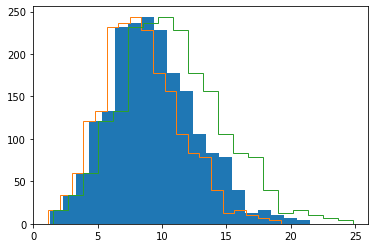

In [13]:
# write a loop to calculate the biased, unbiased, and overly biased variances/stdevs of a series of many samples,
# for comparision with one another

# create some lists to hold the sample standard deviations at each iteration of the loop
sb = []
sub = []
sob = []

# do the experiment 2000 times
for j in range(2000):
    # Sample a Gaussian with mean of 100.0 and a standard deviation of 10.0 ... 5 times.
    npts = 5
    mu = 100.0
    sigma = 10.0

    x = stats.norm.rvs(size=npts,loc=mu,scale=sigma)
    
    # calculate the sample mean (5 samples)
    xbar = np.mean(x)

    # calculate the variance by hand
    vsum = 0.0
    for i in range(len(x)):
        vsum = vsum + (x[i]-xbar)**2
    
    # calculate the variance in three ways - biased (N), unbiased (N-1), and overly biased (N-2)
    variance_b = vsum/npts
    variance_ub = vsum/(npts-1)
    variance_ob = vsum/(npts-2)

    # calculate the standard deviation three ways
    sb.append(np.sqrt(variance_b))
    sub.append(np.sqrt(variance_ub))
    sob.append(np.sqrt(variance_ob))

# convert this lists to numpy arrays
sb = np.array(sb)
sub = np.array(sub)
sob = np.array(sob)

# plot histograms of the standard deviations for all 2000 experiments
# The unbiased version is plotted in solid blue, and the others are plotted as line plots for better visualization.
#
plt.hist(sub,bins=20)
plt.hist(sb,bins=20,histtype='step')
plt.hist(sob,bins=20,histtype='step')

# compare the means of the calculated standard deviations ... NOTE:  The UNBIASED method gives the best estimate!
print(np.mean(sb),np.mean(sub),np.mean(sob))